In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

os.listdir('/home/khalaq04/Downloads/rps')
os.listdir('/home/khalaq04/Downloads/rps-test-set')

['rock', 'paper', 'scissors']

In [2]:
train_dir = '/home/khalaq04/Downloads/rps'
test_dir = '/home/khalaq04/Downloads/rps-test-set'

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'wrap',
    #validation_split = 0.4
)
train_datagen

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.99
)
test_datagen

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 2520 images belonging to 3 classes.
Found 366 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [6]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

In [7]:
accuracy_threshold = 99e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch+1, '\nAccuracy has reached %2.2f%%' %(logs['accuracy']*100), ',training has been stopped.')
            self.model.stop_training = True

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 14s - loss: 1.1141 - accuracy: 0.3725 - val_loss: 1.0649 - val_accuracy: 0.3313
Epoch 2/20
25/25 - 9s - loss: 0.7616 - accuracy: 0.6413 - val_loss: 0.8535 - val_accuracy: 0.7812
Epoch 3/20
25/25 - 8s - loss: 0.3443 - accuracy: 0.8687 - val_loss: 0.4334 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 7s - loss: 0.1966 - accuracy: 0.9450 - val_loss: 0.4650 - val_accuracy: 0.8313
Epoch 5/20
25/25 - 7s - loss: 0.1758 - accuracy: 0.9575 - val_loss: 0.3485 - val_accuracy: 0.8188
Epoch 6/20
25/25 - 6s - loss: 0.1322 - accuracy: 0.9571 - val_loss: 0.1714 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 6s - loss: 0.0807 - accuracy: 0.9775 - val_loss: 0.1213 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 6s - loss: 0.0405 - accuracy: 0.9861 - val_loss: 0.1165 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 6s - loss: 0.0406 - accuracy: 0.9837 - val_loss: 0.0640 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 6s - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.2279 - val_accuracy: 0.9062
Epoch 11/20
25/25 

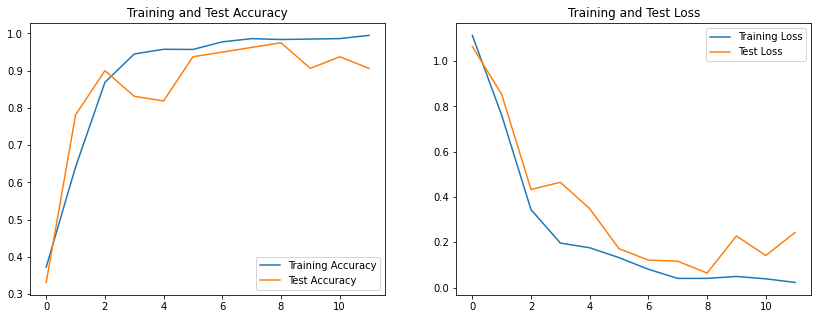

In [9]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')

plt.show()